In [37]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
#sys.path.append("..")
#from partition import *
#from constants import *

In [38]:
def alpha_bf(wave):
    """Value of alpha_bf for H- ion given by Gray Eq. 8.11 (based on wishart, 1979)
        Returns value in units of 1e-18 cm^2/H- ion"""
    a_coef = np.asarray([1.99654,     -1.18267e-5,  2.64243e-6, -4.40524e-10,
                         3.23992e-14, -1.39568e-18, 2.78701e-23])
    alpha = a_coef[0]
    for i in range(1, a_coef.size):
        alpha += a_coef[i]*np.power(wave,i)

    return alpha/1e18

In [39]:
# must be floats
lambda_array = np.arange(2000.00, 18000.00, 100)
a_bf_array = [alpha_bf(i) for i in lambda_array]

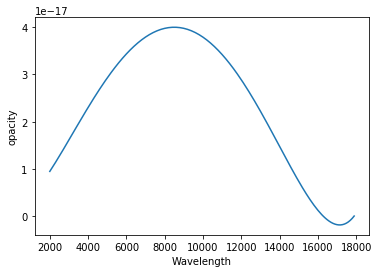

In [40]:
plt.plot(lambda_array, a_bf_array)
plt.xlabel('Wavelength')
plt.ylabel('opacity')
plt.show()

In [41]:

    
def kappa_Hminus_bf(Pe, T, wave):
    """
    Following equation 8.11-12 in Gray
    wave in angstroms
    T in kelvin
    Pe in cgs? dynes/cm^2
    """
    a_bf = alpha_bf(wave)
    theta = 5040/T
    if wave<1000 or wave>16200:
        return 0
    return 4.158e-10 * a_bf * Pe * np.power(theta,(5/2)) * np.power(10,(0.754*theta))

In [42]:
k_Hm_bf_array = [kappa_Hminus_bf(100, 5000, i) for i in lambda_array]

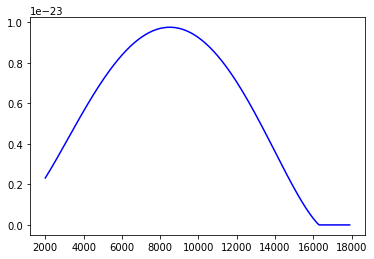

In [43]:
plt.plot(lambda_array, k_Hm_bf_array, 'b-')